# Introduction to relational databases

### What is a relational database?

- Described by **Edgar "Ted" Codd**
- Type of database that is based upon the Relational Model of data

A database consists of tables.

**What is a Table?** - Generally represents one entity type. 

In a relational database, each row or record represents an instance of the entity type.Each column represents an attribute of each instance.

Each row contain an unique identifier, known as a **primary key**, that we can use to explicity access the row in question.

The really cool thing about relational databases is not merely that you have a bunch of tables, but that the tables are linked.

### Relational model

- Widely adopted
- Codd's 12 Rules/Commandments
  * Consists of 13 rules (zero-indexed!)
  * Describes what a Relational Database Management System should adhere to be considered relational.
  
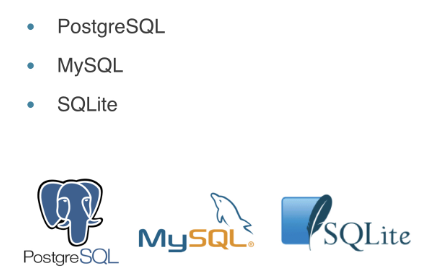

## Creating a Database Engine in Python

We will use a SQLite database:
 - Simple and fast
 - Contains enough functionality to introduce you to all the necessary concepts
 
**SQLAlchemy**
- Works with many *Relational Database Management Systems*
  * Such as Postgres and MySQL

In [2]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')

We use the function **create_engine** to fire up an *SQL engine* that will communicate our queries to the database.
 - Only needs a string that indicates the type of database you're connecting to and the name of the database.

1. We need to know the names of the tables it contains
2. To query the database, we need to connect to the engine to do so. 

In [3]:
table_names = engine.table_names()
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


## Querying relational databases in Python

Time to connect to the engine and query the database.

**Querying** is just a fancy way of saying getting data out from the database.

*HELLO WORLD of SQL*

        SELECT * FROM Table_Name

This query returns all columns of all rows of the Table of interest.

The **star** after **SELECT** means 'all columns'.

1. Import packages and functions
2. Create the database engine
3. Query the database
4. Save query results to a DataFrame
5. Close the connection

In [4]:
# STEP 1
from sqlalchemy import create_engine
import pandas as pd

In [5]:
# STEP 2
engine = create_engine('sqlite:///Chinook.sqlite')
con = engine.connect()

In [7]:
# STEP 3
rs = con.execute("SELECT * FROM Customer")

This creates a SQLAlchemy results object which we assign to the variable *rs*

In [8]:
# STEP 4
df = pd.DataFrame(rs.fetchall())
print(df.head())

   0          1            2   \
0   1       Luís    Gonçalves   
1   2     Leonie       Köhler   
2   3   François     Tremblay   
3   4      Bjørn       Hansen   
4   5  František  Wichterlová   

                                                 3   \
0  Embraer - Empresa Brasileira de Aeronáutica S.A.   
1                                              None   
2                                              None   
3                                              None   
4                                  JetBrains s.r.o.   

                                4                    5     6               7   \
0  Av. Brigadeiro Faria Lima, 2170  São José dos Campos    SP          Brazil   
1          Theodor-Heuss-Straße 34            Stuttgart  None         Germany   
2                1498 rue Bélanger             Montréal    QC          Canada   
3                 Ullevålsveien 14                 Oslo  None          Norway   
4                    Klanova 9/506               Prague  None  Cz

The column names aren't correct. To fix this, before closing the connection, you can set the dataframe's column names by executing:

In [10]:
df.columns = rs.keys()

In [11]:
# STEP 5
con.close()

In [12]:
df.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


### Using the context manager

In [13]:
with engine.connect() as con:
    rs = con.execute("SELECT CustomerID, LastName, Company FROM Customer")
    df = pd.DataFrame(rs.fetchmany(size=5))
    df.columns = rs.keys()

In [14]:
df.head()

,CustomerId,LastName,Company
0,1,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.
1,2,Köhler,None
2,3,Tremblay,None
3,4,Hansen,None
4,5,Wichterlová,JetBrains s.r.o.


In [15]:
# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute('SELECT * FROM Album')

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())


   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3


In [16]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT LastName, Title FROM Employee')
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


In [17]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT * FROM Employee WHERE EmployeeId>=6')
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   

              HireDate                      Address        City State Country  \
0  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  


In [18]:
# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Employee ORDER BY BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           4      Park  Margaret  Sales Support Agent        2.0   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           1     Adams    Andrew      General Manager        NaN   
3           5   Johnson     Steve  Sales Support Agent        2.0   
4           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate              Address        City  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW     Calgary   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW     Calgary   
2  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW    Edmonton   
3  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave     Calgary   
4  1968-01-09 00:00:00  2004-03-04 00:00:00          923 7 ST NW  Lethbridge   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 5G3  +1 (403)

# Querying relational databases directly with Pandas

You can do the previous with 1 Line.

In [20]:
df = pd.read_sql_query('SELECT * FROM Customer', engine)

- The first argument = the query you wish to make
- The second argument = the engine you want to connect to

In [21]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM Album', engine)

# Print head of DataFrame
print(df.head())

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3
True


In [25]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate', engine)

# Print head of DataFrame
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   

              HireDate                      Address        City State Country  \
0  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  


# Advanced Querying: exploiting table relationships

They can capture relationships between tables: the tables are linked. 

**JOIN** by joining two tables together.

In [28]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())

                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


In [29]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query('SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000', engine)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99  
